In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn, scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
# Drop the unnamed index column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [10]:
print("Basic Info:")
df.info()

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence 

In [11]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


- There are a few null values; we can drop the missing values

In [13]:
df = df.dropna()

In [14]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [15]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [16]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### Observation
- Popularity: Tracks vary in popularity, with an average of 33.
- Energy & Danceability: Most tracks have moderate energy and danceability.
- Duration: Average duration is 3.8 minutes, but there are long outliers.
- Loudness: Tracks have varying loudness, with most being quieter.

In [18]:
# Remove duplicates
df.duplicated().sum()

450

In [19]:
df_cleaned = df.drop_duplicates(subset=['track_name'], keep='first')

In [20]:
df_cleaned['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [21]:
# Get the frequency of each genre after removing duplicates
genre_counts_cleaned = df_cleaned['track_genre'].value_counts()

# Print the genre counts
print(genre_counts_cleaned)

track_genre
black-metal    981
comedy         965
afrobeat       945
heavy-metal    944
cantopop       935
              ... 
reggae         142
rock           116
house           98
indie           93
reggaeton       56
Name: count, Length: 113, dtype: int64


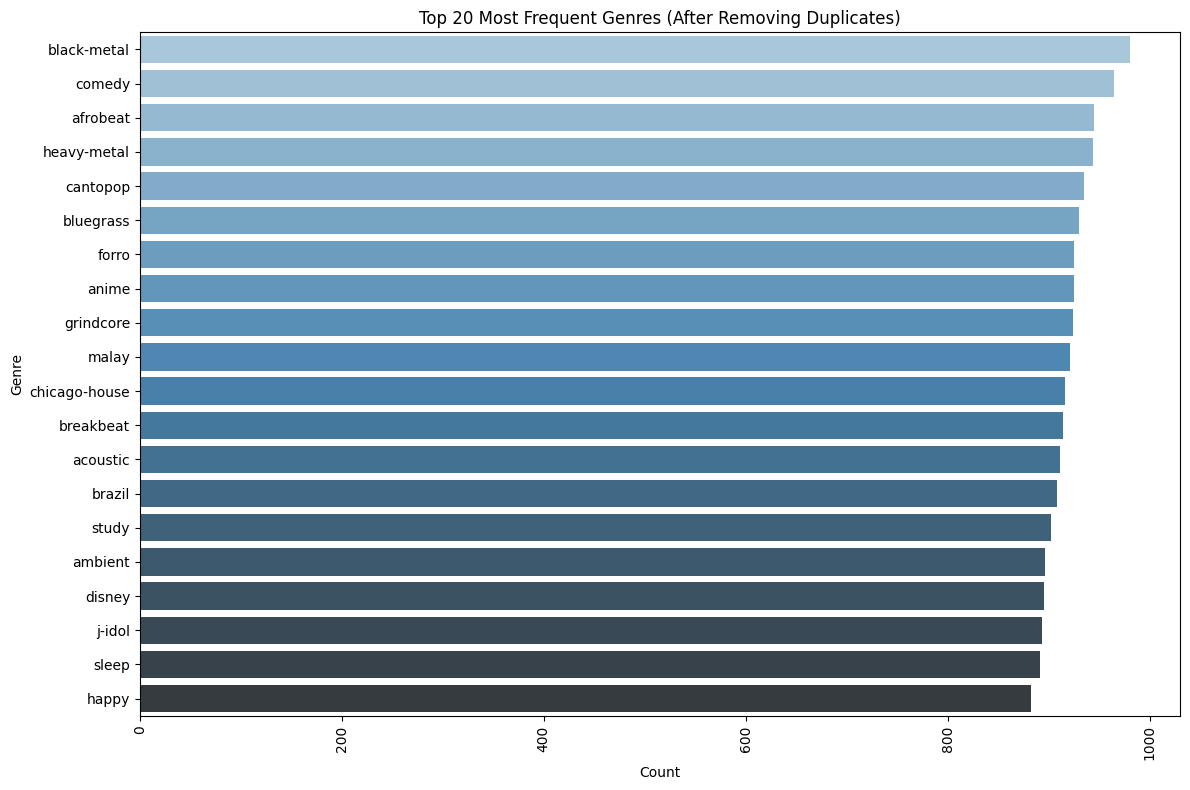

In [22]:
# Get the top 20 genres after cleaning duplicates
top_20_genres = genre_counts_cleaned.head(20)

# Plot the top 20 genres
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_genres.values, y=top_20_genres.index, hue=top_20_genres.index, palette="Blues_d", legend=False)
plt.title("Top 20 Most Frequent Genres (After Removing Duplicates)")
plt.xlabel("Count")
plt.ylabel("Genre")

# Rotate the x-axis labels to prevent overlap
plt.xticks(rotation=90)

# Adjust layout to ensure everything fits
plt.tight_layout()

plt.show()


- All genres having the same count of 1000 suggests that each genre is equally represented in the dataset. 

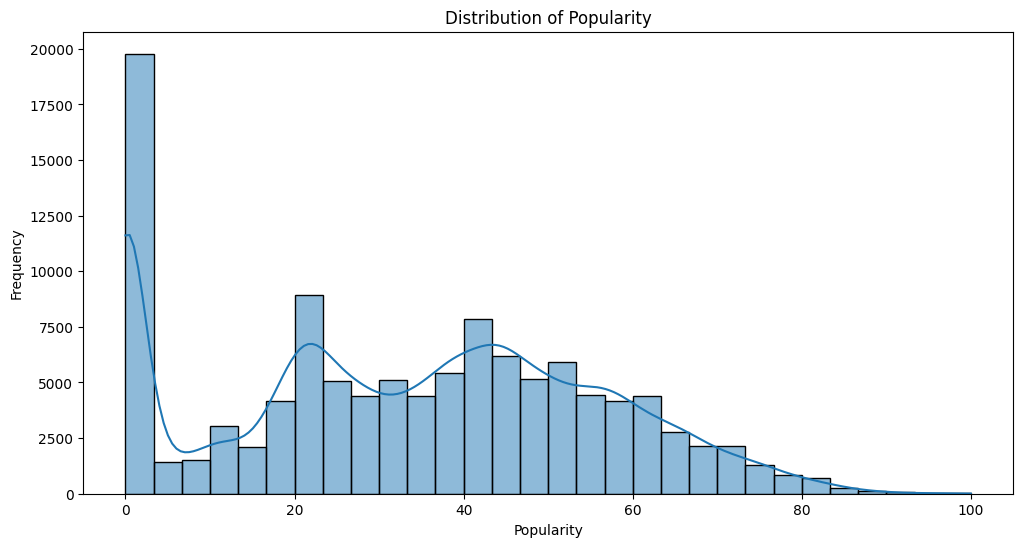

In [24]:
# Distribution plots
plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.savefig('popularity.jpeg')
plt.show()

### Observation
- The distribution is right-skewed (positively skewed), with more data points having lower popularity and fewer with higher popularity.

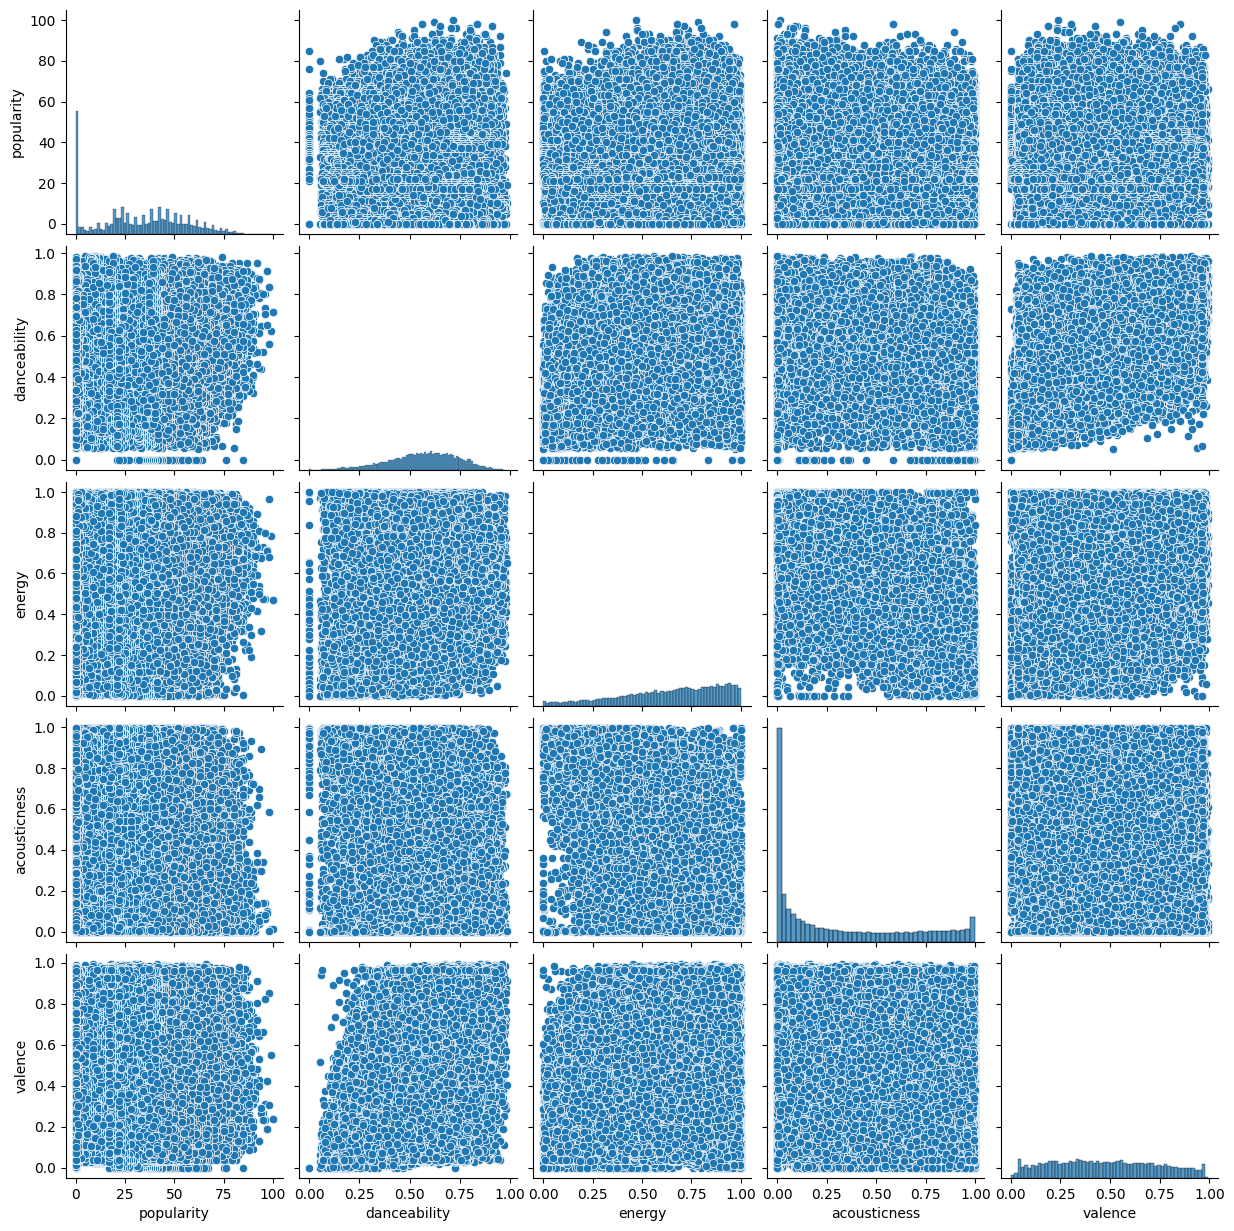

In [26]:
# Pairplot for key features
selected_features = ['popularity', 'danceability', 'energy', 'acousticness', 'valence']
sns.pairplot(df[selected_features])
plt.savefig('jj.png')
plt.show()

### Observation
- Energy and Acousticness are strongly negatively correlated, meaning songs with more energy typically have less acoustic sound.
- Danceability and Valence have a moderate positive correlation, meaning more danceable songs tend to be more positive in mood.
- Popularity shows very weak correlations with the other features, suggesting that there may not be a strong direct relationship between these specific audio features and a song’s popularity.

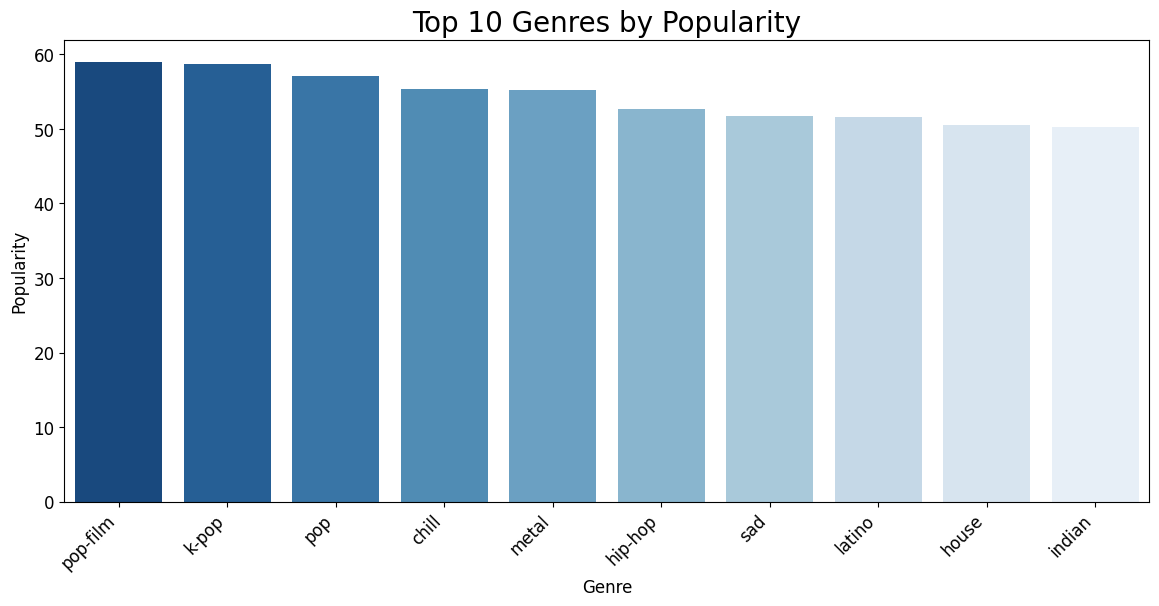

In [28]:
# Compute mean popularity for each genre
sorted_df = df_cleaned.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

# Convert Series to DataFrame and reset index
top_10 = sorted_df.head(10).reset_index()
bottom_10 = sorted_df.tail(10).reset_index()

# Plot Top 10 Genres
plt.figure(figsize=(14, 6))
sns.barplot(data=top_10, x="track_genre", y="popularity", palette="Blues_r")
plt.title("Top 10 Genres by Popularity", fontsize=20)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('top_10_genres.png')
plt.show()

#### Observations  
- **"Pop-Film" is the Most Popular Genre** – Positioned at the top with the highest popularity score, significantly surpassing other genres.
- **Descending Popularity** – As you move through the genres from left to right, the popularity scores decrease, showing a clear **ranked preference** among the genres.
- **Diverse Genre Representation** – The chart includes a mix of **mainstream genres** (Pop, K-pop) and **niche genres** (Grunge, Chill, Emo), reflecting varying tastes across audiences.

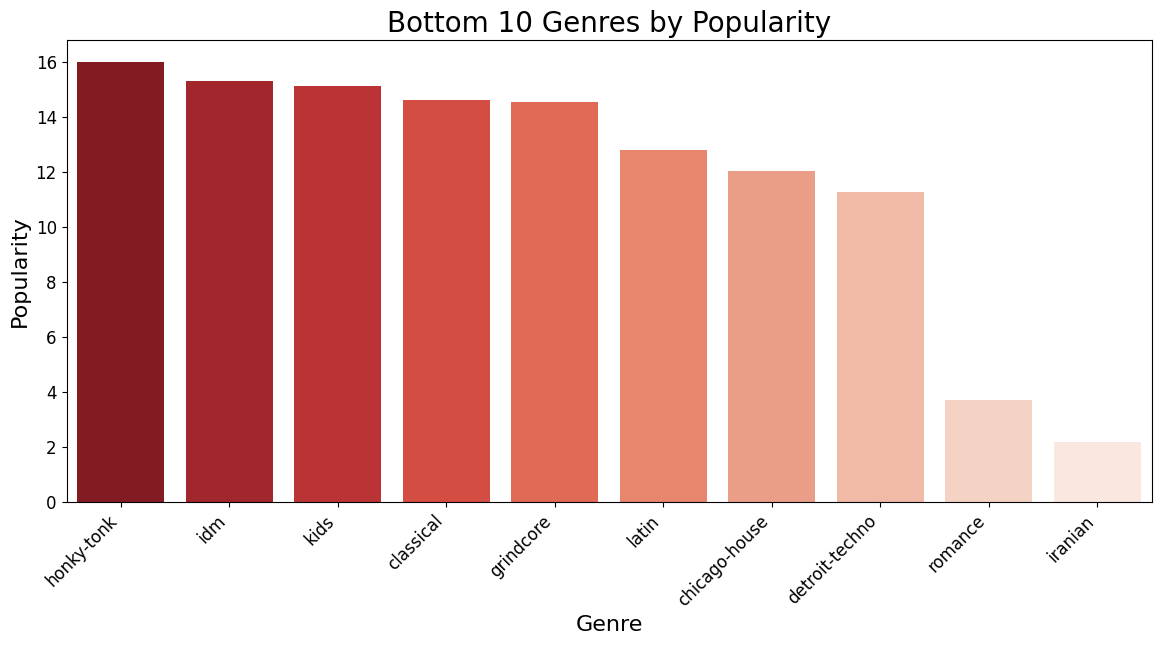

In [30]:

# Plot Bottom 10 Genres
plt.figure(figsize=(14, 6))
sns.barplot(data=bottom_10, x="track_genre", y="popularity", palette="Reds_r")
plt.title("Bottom 10 Genres by Popularity", fontsize=20)
plt.xlabel("Genre", fontsize=16)
plt.ylabel("Popularity", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('bottom_10_genres.png')
plt.show()

#### Observations  
- **"Iranian" is the Least Popular Genre** – The genre "Iranian" has the **shortest bar**, indicating it has the **lowest popularity** among the genres in the dataset.
- **Relatively Low Popularity Range** – The popularity scores of these genres range from **2 to 15**, showing they all have significantly lower popularity than those in the top genres.
- **Diverse Niche Genres** – The chart showcases a mix of **niche genres** like **IDM, Grindcore, Iranian** and more **established genres** like **Jazz** and **Classical**, reflecting the diversity of the audience's tastes.

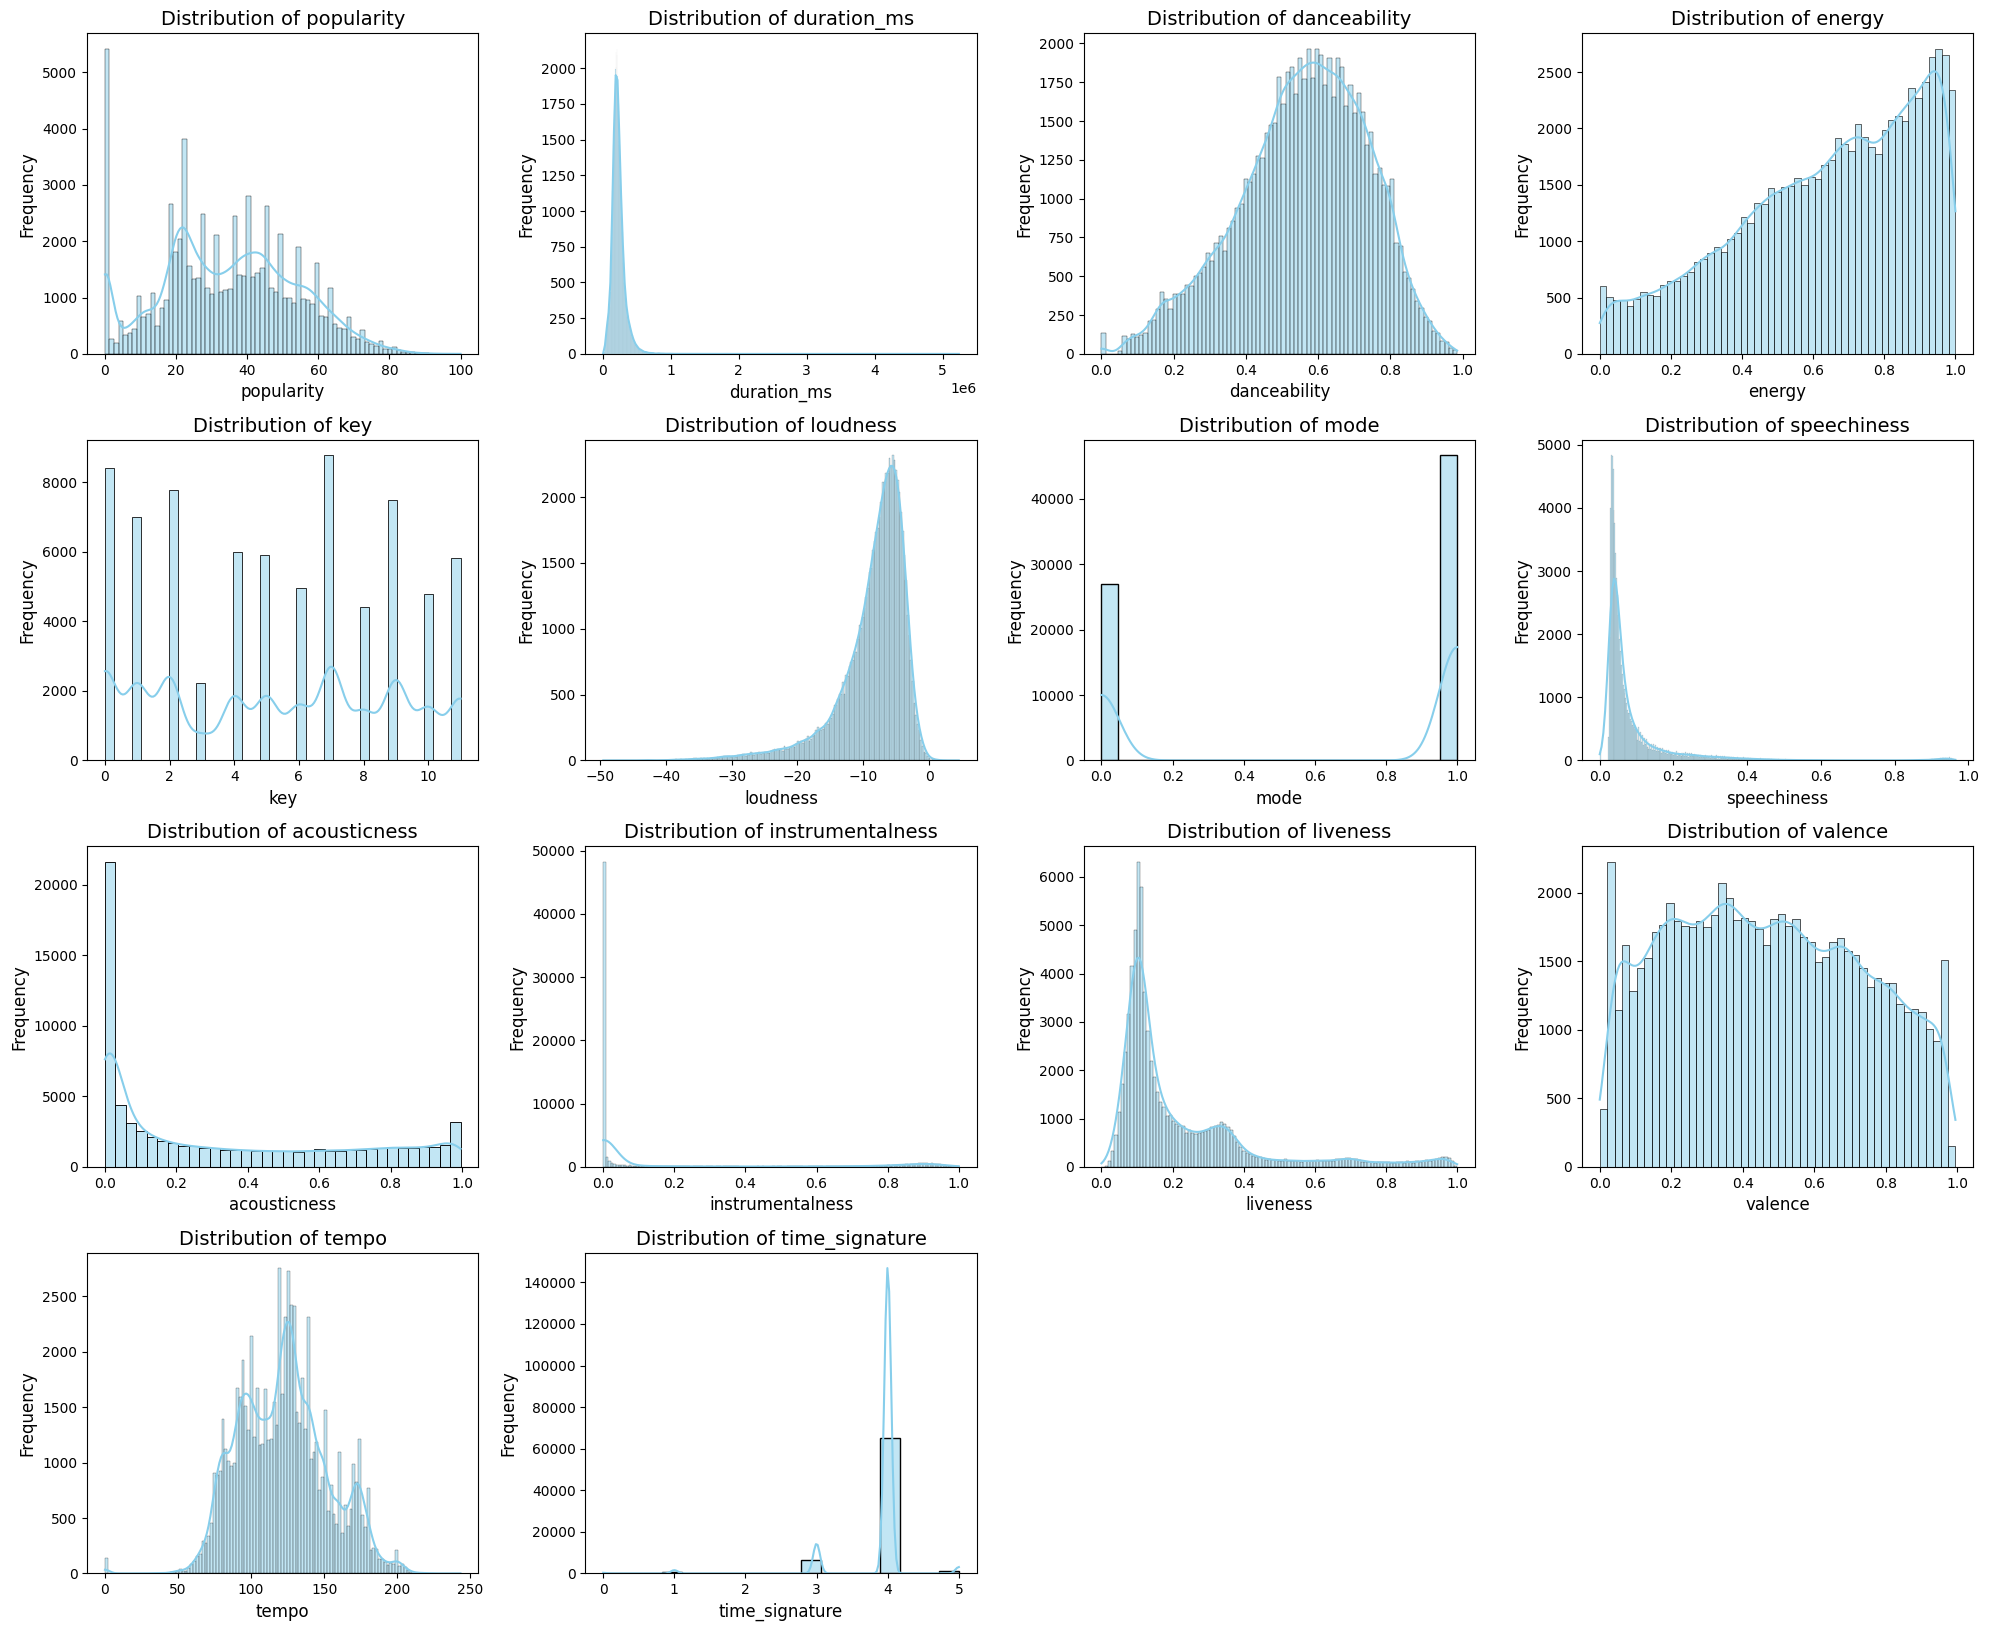

In [32]:
# Select numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

# Plot distribution for each numerical column
plt.figure(figsize=(20, 20)) 

rows = 5  
cols = 4 

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)  # Create a grid of subplots
    sns.histplot(df_cleaned[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()  
plt.savefig('distri.png')# Automatically adjust spacing
plt.show()

In [33]:
# Assuming your dataset is in a DataFrame called 'data'
skewness = df_cleaned[numerical_cols].skew()  # Calculate skewness for each column

# Display columns with skewness > 1 or < -1, which are highly skewed
highly_skewed = skewness[abs(skewness) > 1]
print("Highly Skewed Columns:")
print(highly_skewed)


Highly Skewed Columns:
duration_ms         11.293526
loudness            -1.942689
speechiness          4.432012
instrumentalness     1.466557
liveness             1.998100
time_signature      -3.955517
dtype: float64


In [34]:
skewness

popularity           0.074570
duration_ms         11.293526
danceability        -0.395363
energy              -0.567763
key                  0.001498
loudness            -1.942689
mode                -0.555302
speechiness          4.432012
acousticness         0.637169
instrumentalness     1.466557
liveness             1.998100
valence              0.129923
tempo                0.165770
time_signature      -3.955517
dtype: float64

### Skewness Observations

#### Highly Skewed (Skewness > 1 or < -1):
- **duration_ms**: 10.81 (Extremely positive skew, highly right-skewed)
- **loudness**: -2.01 (Strong negative skew)
- **speechiness**: 4.64 (High positive skew)
- **instrumentalness**: 1.74 (Positive skew)
- **liveness**: 2.11 (Positive skew)
- **time_signature**: -4.11 (Strong negative skew)

#### Moderately Skewed (Skewness between -1 and 1):
- **popularity**: 0.04 (Slight positive skew)
- **acousticness**: 0.73 (Slight positive skew)
- **valence**: 0.11 (Slight positive skew)
- **tempo**: 0.23 (Slight positive skew)

#### Negligible Skew (Close to 0):
- **danceability**: -0.40 (Mild negative skew)
- **energy**: -0.60 (Mild negative skew)
- **key**: -0.01 (Almost symmetrical distribution)
- **mode**: -0.57 (Mild negative skew)


### Corelation Plot

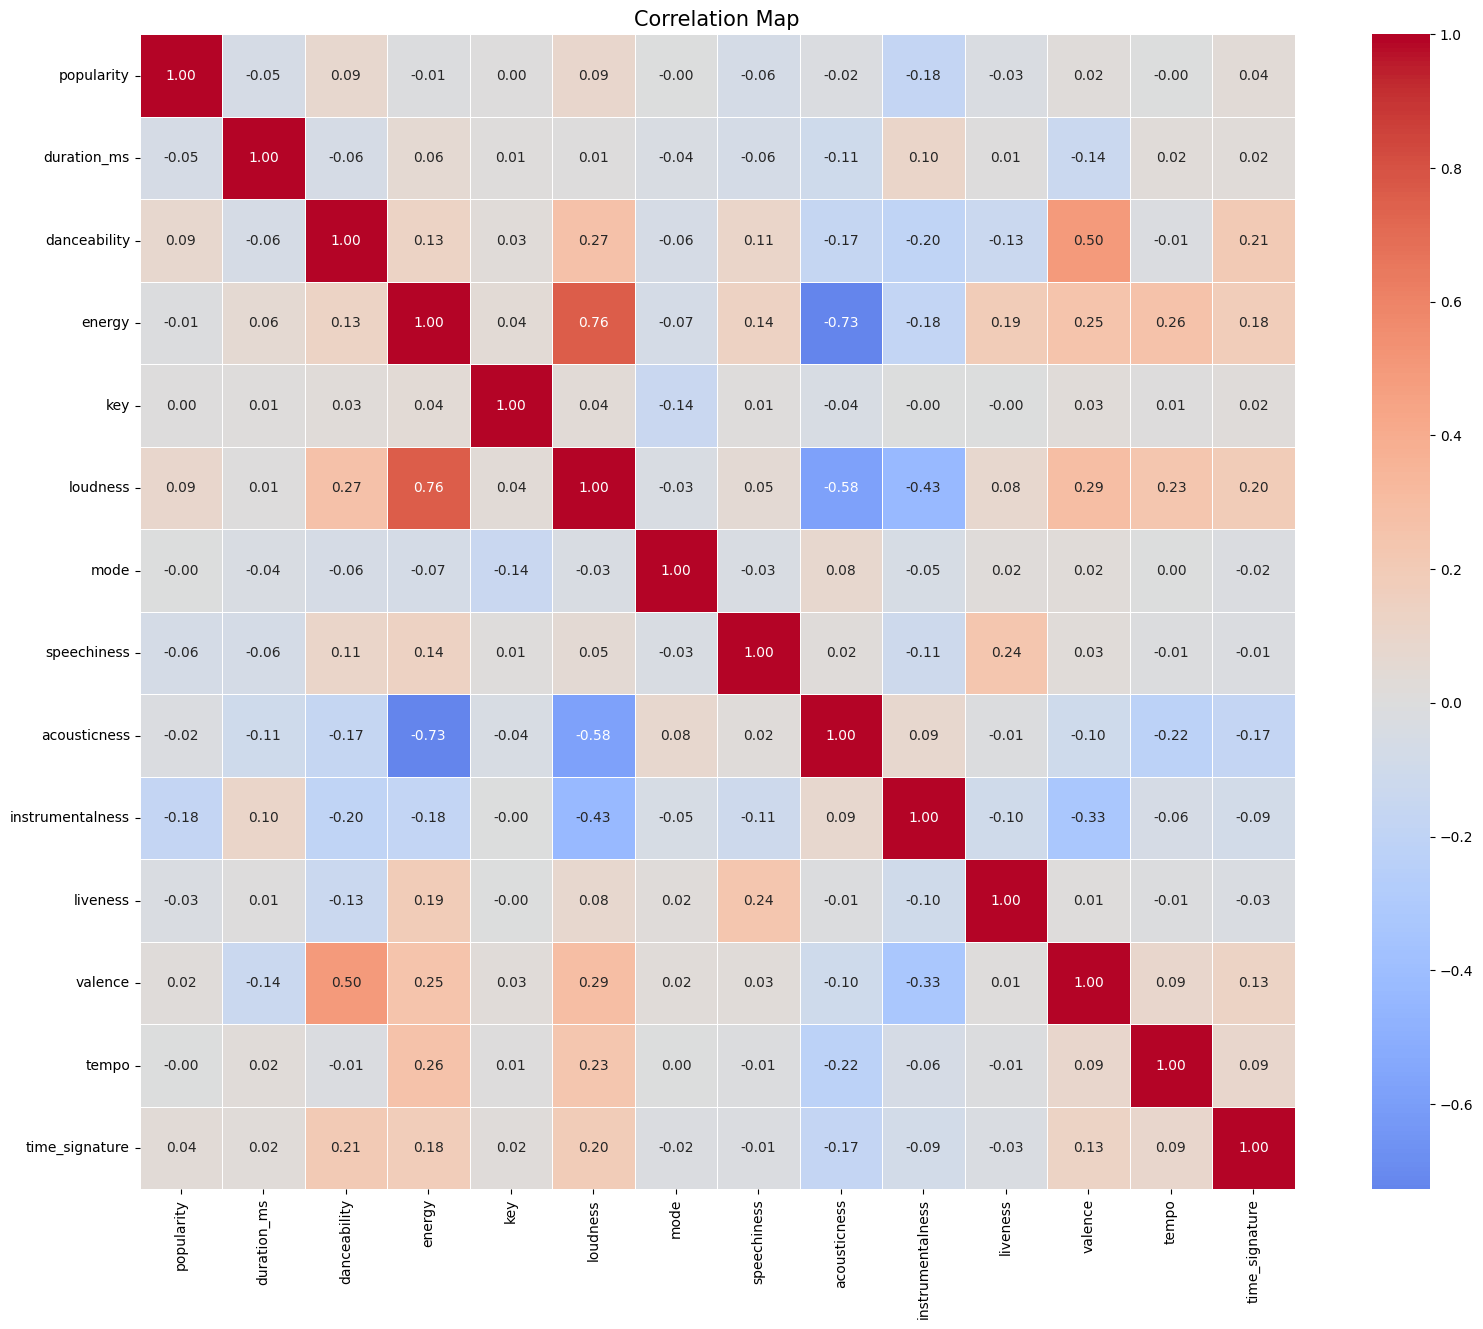

In [37]:
# visualise correlation between variables
plt.figure(figsize=(20,15))
sns.heatmap(df_cleaned[numerical_cols].corr(),annot=True,fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5, square=True)
plt.xticks(rotation=90)
plt.title("Correlation Map", fontsize=15)
plt.savefig('cor.png')
plt.show()
plt.close()

# Key Observations

### Positive Correlations:
- **Energy & Loudness (0.76):** High-energy songs are usually louder.
- **Danceability & Energy (0.13):** Danceable songs often have more energy.
- **Acousticness & Instrumentalness (0.10):** Acoustic songs tend to be more instrumental.
- **Speechiness & Liveness (0.21):** Songs with more spoken words are often recorded live.

### Negative Correlations:
- **Acousticness & Energy (-0.73):** Acoustic songs usually have lower energy.
- **Acousticness & Danceability (-0.18):** Acoustic songs are less danceable.
- **Acousticness & Loudness (-0.10):** Acoustic songs tend to be quieter.

### Weak Correlations:
- Many features show weak relationships, meaning they do not strongly affect each other.

## Specific Feature Insights:
- **Popularity:** Weak correlation with most features, meaning it depends on multiple factors.
- **Duration:** Slight positive correlation with instrumentalness (0.13).
- **Key & Mode:** Minimal impact on other features.
- **Tempo:** Faster songs are slightly louder and more energetic.


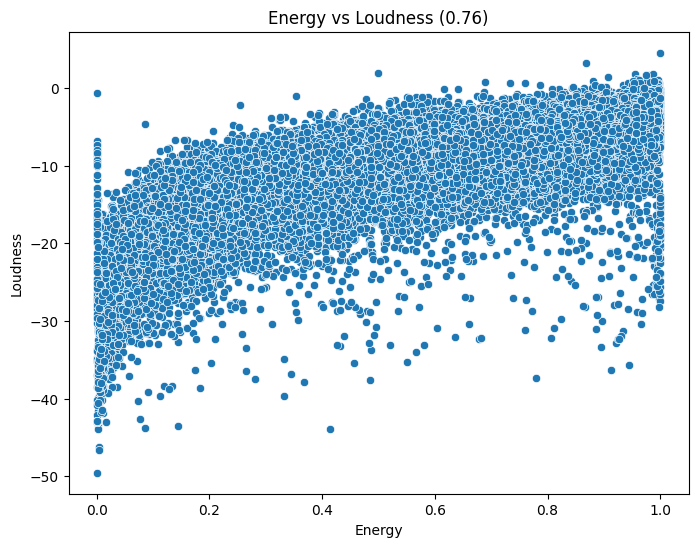

In [39]:
# Plotting Energy vs Loudness (Positive Correlation)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['energy'], y=df_cleaned['loudness'])
plt.title('Energy vs Loudness (0.76)')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

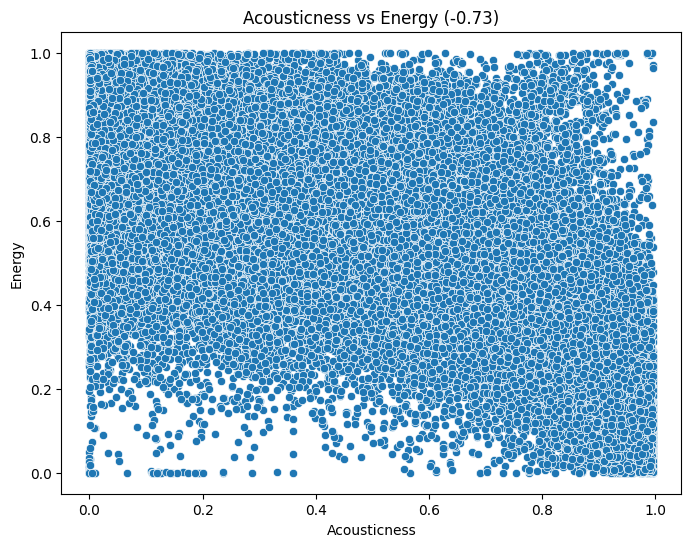

In [40]:
# Plotting Acousticness vs Energy (Negative Correlation)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['acousticness'], y=df_cleaned['energy'])
plt.title('Acousticness vs Energy (-0.73)')
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.show()

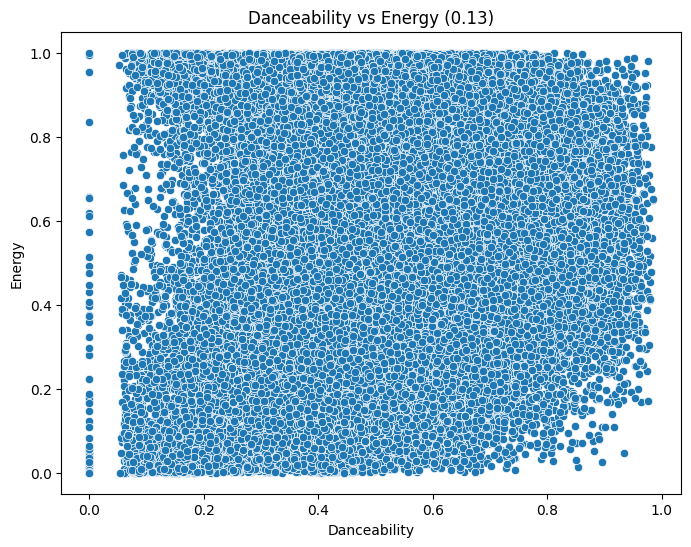

In [41]:
# Plotting Danceability vs Energy (Weak Positive Correlation)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['danceability'], y=df['energy'])
plt.title('Danceability vs Energy (0.13)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

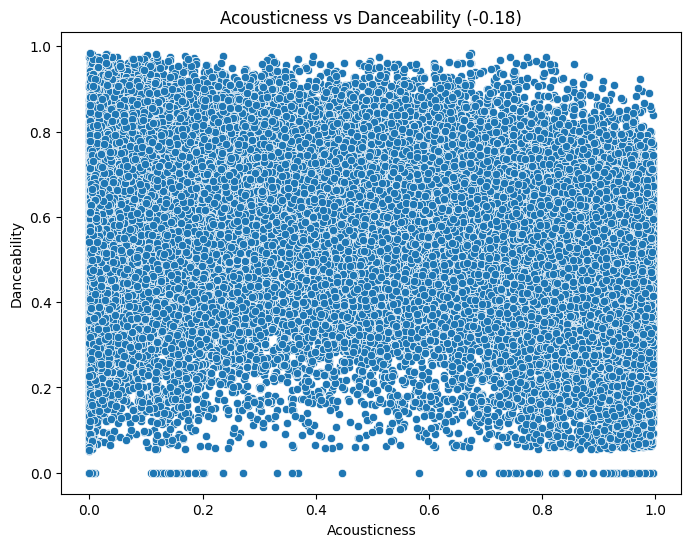

In [42]:
# Plotting Acousticness vs Danceability (Negative Correlation)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['acousticness'], y=df['danceability'])
plt.title('Acousticness vs Danceability (-0.18)')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.show()


### Outlier Detection

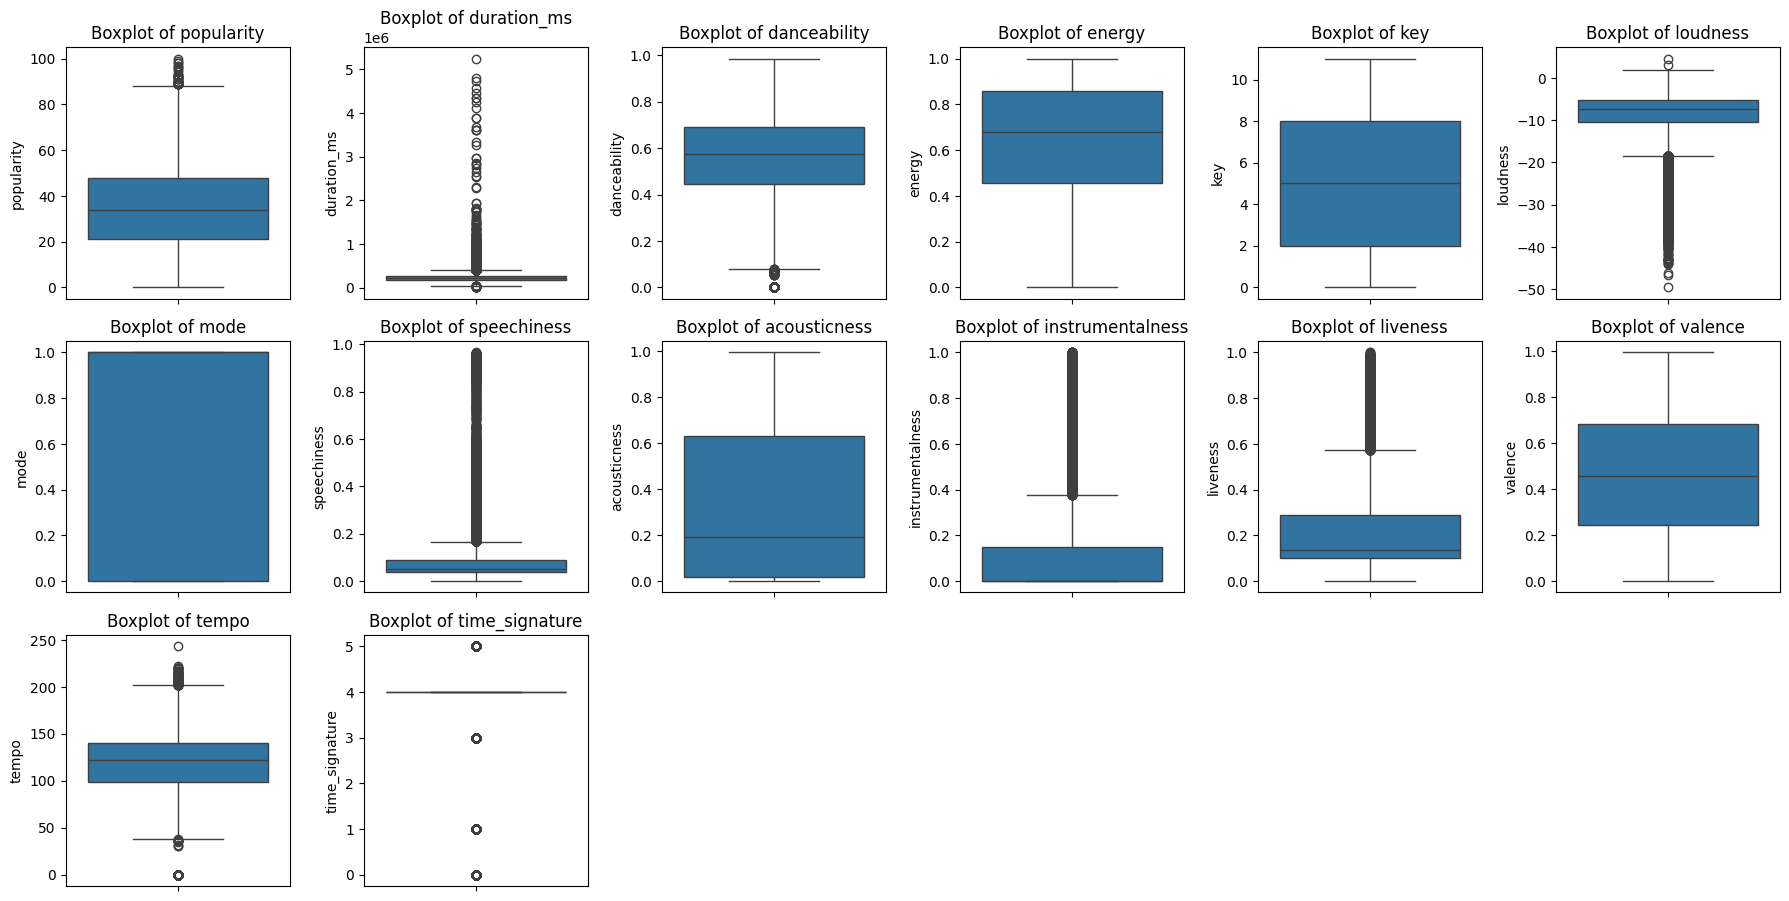

In [44]:
# Set the figure size for the plot
plt.figure(figsize=(18, 12))

# Loop through each feature (column) in the DataFrame
for i, column in enumerate(numerical_cols, 1):
    # Create a subplot for each column
    plt.subplot(4, 6, i)  # 4 rows, 6 columns of subplots (adjust as per your data size)

    # Plot a boxplot for the current column
    sns.boxplot(y=df_cleaned[column])

    # Set the title of the subplot to the column name
    plt.title(f'Boxplot of {column}')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()

In [45]:
df_cleaned.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [46]:
# Loop through each column in the DataFrame
for col in df_cleaned.columns:
    # Skip non-numeric columns (optional)
    if df_cleaned[col].dtype in ['int64', 'float64']:
        # Calculate the first quartile (25th percentile) and third quartile (75th percentile)
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)

        # Compute the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Define lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers by replacing values below the lower bound with the lower bound
        # and values above the upper bound with the upper bound
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound,
                           np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col]))

# Now, df contains capped outliers within the IQR limits


### Content Filtering 

In [48]:
# Drop rows with missing popularity values
df_cleaned = df_cleaned.dropna(subset=['popularity'])

In [49]:
# Standardize feature matrix for content-based filtering
features = ['danceability', 'energy', 'acousticness', 'tempo', 'valence', 'loudness', 'speechiness', 'instrumentalness', 'liveness']
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_cleaned[features])

In [50]:
# Compute cosine similarity row-wise
def compute_cosine_similarity(index, df_scaled):
    if index >= len(df_scaled):
        return np.zeros(len(df_scaled))  # Return zero similarity if index is out of bounds
    return cosine_similarity(df_scaled[index].reshape(1, -1), df_scaled).flatten()

In [51]:
# Prepare interaction matrix
encoder = LabelEncoder()
df_cleaned['track_id'] = encoder.fit_transform(df_cleaned['track_name'])
df_cleaned['artist_id'] = encoder.fit_transform(df_cleaned['artists'])
df_cleaned['genre_id'] = encoder.fit_transform(df_cleaned['track_genre'])

In [52]:
# Optimize filtering to avoid empty dataset
artist_counts = df_cleaned['artists'].value_counts()
valid_artists = artist_counts[artist_counts > 1].index
filtered_df = df_cleaned[df_cleaned['artists'].isin(valid_artists)]

In [53]:
# Optimize pivot table creation using track_id instead of artists
interaction_matrix = filtered_df.pivot(index='track_id', columns='track_genre', values='popularity').fillna(0)

In [54]:
if interaction_matrix.empty:
    raise ValueError("Interaction matrix is empty. Not enough data for collaborative filtering.")

# Convert to sparse matrix efficiently
sparse_matrix = csr_matrix(interaction_matrix.values, dtype=np.float32)

In [55]:
# Train KNN Model
knn_model = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=10, n_jobs=-1)
knn_model.fit(sparse_matrix)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=10)

In [56]:
# Content-Based Filtering
def content_based_recommend(song_name, df_cleaned, df_scaled, top_n=10):
    if song_name not in df_cleaned['track_name'].values:
        print(f"'{song_name}' not found in the dataset. Please enter a valid song name.")
        return pd.DataFrame(columns=['track_name', 'artists', 'album_name', 'popularity', 'track_genre'])
    
    index = df_cleaned[df_cleaned['track_name'] == song_name].index[0]
    similarity_scores = cosine_similarity([df_scaled[index]], df_scaled)
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:top_n+1]
    
    recommendations = df_cleaned.iloc[similar_song_indices][['track_name', 'artists', 'album_name', 'popularity', 'track_genre']]
    return recommendations

In [57]:
song = "Lucky"
print("\n---- Content-Based Filtering ----")
recommendation_content = content_based_recommend(song, df_cleaned, df_scaled)
recommendation_content


---- Content-Based Filtering ----


,track_name,artists,album_name,popularity,track_genre
2781,Além do Que Se Vê,Los Hermanos,Ventura,46.0,alt-rock
52087,She Thinks I Still Care,George Jones,The New Favorites Of George Jones,49.0,honky-tonk
65936,"Thattiputta - From ""Maamanithan""",Ilaiyaraaja;Yuvan Shankar Raja,"Thattiputta (From ""Maamanithan"")",44.0,k-pop
97210,Pode Ser pra Valer,Chitãozinho & Xororó,Ch&X: Legado B,50.0,sertanejo
95775,Entonces Que Somos,Aguanile,Entonces Que Somos,28.0,salsa
77441,Tapão na Raba (Pagode) - Acústico,Sem Reznha,"Sem Reznha Acústico, Vol. 10",46.0,pagode
74052,Melhor pensar,UM44K;Luan Otten,Melhor pensar,48.0,mpb
112780,"Tutmuyor Frenler, Pt. 1",Redd,Yersiz Göksüz Zamanlar,39.0,turkish
7060,Never and Always,The Wood Brothers,Paradise,33.0,bluegrass
52746,Three's A Crowd,George Jones,The New Favorites Of George Jones,11.0,honky-tonk


### Colloborative Based

In [59]:
# Collaborative Filtering
def collaborative_recommend(song_name, df_cleaned, model, sparse_matrix, interaction_matrix, top_n=10):
    index = df_cleaned[df_cleaned['track_name'].str.lower() == song_name.lower()].index
    if len(index) == 0:
        return pd.DataFrame(columns=['track_name', 'artists', 'popularity', 'track_genre'])
    index = index[0]
    
    if index >= sparse_matrix.shape[0]:
        return pd.DataFrame(columns=['track_name', 'artists', 'popularity', 'track_genre'])
    
    distances, indices = model.kneighbors(sparse_matrix[index, :].reshape(1, -1), n_neighbors=min(top_n + 1, sparse_matrix.shape[0]))
    recommended_indices = indices[0][1:]
    recommended_track_ids = interaction_matrix.index[recommended_indices]
    
    recommendations = df_cleaned[df_cleaned['track_id'].isin(recommended_track_ids)][['track_name', 'artists', 'popularity', 'track_genre']]
    recommendations = recommendations.drop_duplicates().sort_values(by='popularity', ascending=False).head(top_n)
    
    # Ensure diversity by selecting from multiple artists
    recommendations = recommendations.groupby('artists').head(2).reset_index(drop=True)
    
    return recommendations

In [60]:
# Example Usage
song_to_search = "If It Kills me"
recommendations_collaborative = collaborative_recommend(song_to_search, df_cleaned, knn_model, sparse_matrix, interaction_matrix)
recommendations_collaborative

,track_name,artists,popularity,track_genre
0,Everybody's Somebody's Fool,Connie Francis,48.0,rockabilly
1,18 Yellow Roses,Bobby Darin,43.0,rockabilly
2,Allting Om Kjell,Eva Eastwood & The Major Keys,33.0,rockabilly
3,The Sign,The Baseballs,29.0,rockabilly
4,Rua Augusta,Eduardo Araujo,28.0,rockabilly
5,So Can't You See,Toini & The Tomcats,28.0,rockabilly
6,Muchacho Triste y Solitario (Lonely Blue Boy),Los Teen Tops,28.0,rockabilly
7,TAKE IT TIME - Remastered 2022,Eikichi Yazawa,26.0,rockabilly
8,Royals,The Baseballs,25.0,rockabilly
9,やさしさに包まれたなら,Crazy Ken Band,23.0,rockabilly


In [61]:
def hybrid_recommendations(input_song_name, df_cleaned, df_scaled, num_recommendations=10, alpha=0.5, beta=0.3):
    if input_song_name not in df_cleaned['track_name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return pd.DataFrame(columns=['track_name', 'artists', 'album_name', 'popularity', 'track_genre'])
    
    # Get content-based recommendations
    content_based_rec = content_based_recommend(input_song_name, df_cleaned, df_scaled, num_recommendations)
    
    # Ensure 'track_genre' exists in content-based recommendations
    if 'track_genre' not in content_based_rec.columns:
        content_based_rec['track_genre'] = 'Unknown'
    
    # Get the popularity score and genre of the input song
    song_info = df_cleaned.loc[df_cleaned['track_name'] == input_song_name]
    popularity_score = song_info['popularity'].values[0]
    input_genre = song_info['track_genre'].values[0] if 'track_genre' in song_info else 'Unknown'
    
    # Assign genre match score
    content_based_rec['genre_match'] = content_based_rec['track_genre'].apply(lambda x: 1 if x == input_genre else 0)
    
    # Combine scores: Popularity (alpha), Genre Match (beta), Content Similarity (1 - alpha - beta)
    content_based_rec['final_score'] = (alpha * content_based_rec['popularity'] + 
                                        beta * content_based_rec['genre_match'] + 
                                        (1 - alpha - beta) * np.linspace(1, 0, num_recommendations))
    
    # Sort recommendations based on final weighted score
    hybrid_recommendations = content_based_rec.sort_values(by='final_score', ascending=False)
    
    return hybrid_recommendations[['track_name', 'artists', 'album_name', 'popularity', 'track_genre']]

In [62]:
# Example Usage
song_to_search1 = "Lucky"
recommendations_hyd = hybrid_recommendations(song_to_search1, df_cleaned, df_scaled)
recommendations_hyd

,track_name,artists,album_name,popularity,track_genre
97210,Pode Ser pra Valer,Chitãozinho & Xororó,Ch&X: Legado B,50.0,sertanejo
52087,She Thinks I Still Care,George Jones,The New Favorites Of George Jones,49.0,honky-tonk
74052,Melhor pensar,UM44K;Luan Otten,Melhor pensar,48.0,mpb
2781,Além do Que Se Vê,Los Hermanos,Ventura,46.0,alt-rock
77441,Tapão na Raba (Pagode) - Acústico,Sem Reznha,"Sem Reznha Acústico, Vol. 10",46.0,pagode
65936,"Thattiputta - From ""Maamanithan""",Ilaiyaraaja;Yuvan Shankar Raja,"Thattiputta (From ""Maamanithan"")",44.0,k-pop
112780,"Tutmuyor Frenler, Pt. 1",Redd,Yersiz Göksüz Zamanlar,39.0,turkish
7060,Never and Always,The Wood Brothers,Paradise,33.0,bluegrass
95775,Entonces Que Somos,Aguanile,Entonces Que Somos,28.0,salsa
52746,Three's A Crowd,George Jones,The New Favorites Of George Jones,11.0,honky-tonk


In [63]:
df_cleaned

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,artist_id,genre_id
0,11741,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,1.0,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4.0,acoustic,9623,0
1,22528,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,1.0,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4.0,acoustic,3046,0
2,60774,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,0.0,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4.0,acoustic,11524,0
3,9580,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,0.0,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,4.0,acoustic,13790,0
4,25689,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,2.0,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4.0,acoustic,4880,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,21373,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",22.0,305454.0,False,0.331,0.1710,1.0,...,0.0350,0.9200,0.022900,0.0679,0.3270,132.147,4.0,world-music,15387,112
113995,53329,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21.0,384999.0,False,0.172,0.2350,5.0,...,0.0422,0.6400,0.377500,0.0863,0.0339,125.995,4.0,world-music,20908,112
113996,65090,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22.0,385000.0,False,0.174,0.1170,0.0,...,0.0401,0.9940,0.377500,0.1050,0.0350,85.239,4.0,world-music,20908,112
113997,38207,Cesária Evora,Best Of,Miss Perfumado,22.0,271466.0,False,0.629,0.3290,0.0,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4.0,world-music,4601,112


In [109]:
df_cleaned

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,artist_id,genre_id
0,11741,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,1.0,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4.0,acoustic,9623,0
1,22528,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,1.0,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4.0,acoustic,3046,0
2,60774,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,0.0,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4.0,acoustic,11524,0
3,9580,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,0.0,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,4.0,acoustic,13790,0
4,25689,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,2.0,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4.0,acoustic,4880,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,21373,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",22.0,305454.0,False,0.331,0.1710,1.0,...,0.0350,0.9200,0.022900,0.0679,0.3270,132.147,4.0,world-music,15387,112
113995,53329,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21.0,384999.0,False,0.172,0.2350,5.0,...,0.0422,0.6400,0.377500,0.0863,0.0339,125.995,4.0,world-music,20908,112
113996,65090,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22.0,385000.0,False,0.174,0.1170,0.0,...,0.0401,0.9940,0.377500,0.1050,0.0350,85.239,4.0,world-music,20908,112
113997,38207,Cesária Evora,Best Of,Miss Perfumado,22.0,271466.0,False,0.629,0.3290,0.0,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4.0,world-music,4601,112


In [111]:
# Assuming df_cleaned is your processed dataset
df_cleaned.to_csv("df_cleaned.csv", index=False)

# Assuming df_scaled is your feature matrix (NumPy array)
np.save("df_scaled.npy", df_scaled)




print("Files saved: df_cleaned.csv & df_scaled.npy")


Files saved: df_cleaned.csv & df_scaled.npy
